## MLPs

Neural networks get their name from their loose inspriration of connections between neurons in the brain and how the brain learns by strengthening these connections. While the mechanisms that enable a human brain to capture complex patterns are vastly different to how neural networks are designed, neural networks still borrow loads of their terminology from the description of the brain. One such example is the neuron that is in the name of neural networks.

### An Artificial Neuron
The artificial neuron is supposed to simulate the firing process of an actual neuron. Getting an input vector $\vvec{x}$, the artificial neuron computes a (typically nonnegative) output based on an affine function and a nonlinear activation function $\phi$. Graphically, this is typically presented like this:
```{tikz}
\tikzset{%
  every neuron/.style={
    circle,
    draw,
    minimum size=0.5cm
  },
  neuron missing/.style={
    draw=none, 
    scale=2,
    text height=0.25cm,
    execute at begin node=$\vdots$
  },
}

\begin{tikzpicture}[x=1.5cm, y=1cm, >=stealth]

% Create input nodes
\foreach \m [count=\y] in {1,2,3,missing,4}
  \node [every neuron/.try, neuron \m/.try] (input-\m) at (0,2.5-\y) {};

% Create output node
\node [every neuron/.try] (output) at (1.3,-0.2) {};

\foreach \l [count=\i] in {1,2,3,d}
  \draw [<-] (input-\i) -- ++(-0.7,0)
    node [above, midway] {$x_\l$};

\draw [->] (output) -- ++(2,0)
    node [above, midway] {$\phi_a(\mathbf{w}^\top\mathbf{x}+b)$};

\foreach \i in {1,...,4}
    \draw [->] (input-\i) -- (output);
    

\end{tikzpicture}
```
The input is inserted into the neuron and a weighted sum of the input with the coefficients of the vector $\vvec{w}$ is symbolized by the directed edges from the input nodes to the output node. We can imagine that every edge from node $k$ has edge weight $w_k$, which is multiplied with the input $x_k$, returning $w_kx_k$ at the end of each single edge. All the edges are summed up, yielding $\sum_k w_kx_k$.       

Within the output node, we add a bias term and apply the **activation function** $\phi_a$. In the beginning, the sigmoid function has been used as an activation function, since it has this nice interpretation as a soft thresholding function that simulates the _firing_ or _not firing_ status of a neuron. However, the sigmoid function suffers from optimization issues, which is why other activations became more popular. We discuss this later.     


In summary, a neuron computes the following function: 

:::{math}
:label: neuron_output1
\begin{align*}
\phi_a \left( \sum_{k=1}^{d} w_{k} x_{k} + b \right) = \phi(\vvec{w}^\top \vvec{x}+b)
\end{align*}
:::
```{note}
Any affine function in $d$ dimensions can be written as a linear function in $d+1$ dimensions (as we also did it for the application of linear regression for learning affine functions). That is, we absorb the bias into the weights by specifying $ w_{0} = b $ and creating a new dummy input $ x_{0} = 1 $. This way we can write an affine function as a linear function.
:::{math}
:label: neuron_output3
\begin{align*}
\phi_a \left( \sum_{k=0}^{d} w_{k} x_{k} \right) = \phi(\vvec{w}^\top \vvec{x}).
\end{align*}
:::
Because of this notational possibility, we speak in machine learning often of a linear function although we technically mean an affine function. This happens in particular in the  neural networks terminology.
```
### From Neuron to Layer
We can stack now  multiple neurons into a **layer**. The plot below shows the input being transformed into a $d_1$-dimensional space by $d_1$ neurons. Each neuron computes an affine function $\vvec{w}_j^\top\vvec{x}+b_j$ followed by an activation function $\phi_a$.
```{tikz}
\tikzset{%
  every neuron/.style={
    circle,
    draw,
    minimum size=0.5cm
  },
  neuron missing/.style={
    draw=none, 
    scale=2,
    text height=0.25cm,
    execute at begin node=$\vdots$
  },
}

\begin{tikzpicture}[x=1.5cm, y=1cm, >=stealth]

% Create input nodes
\foreach \m/\l [count=\y] in {1,2,3,missing,4}
  \node [every neuron/.try, neuron \m/.try] (input-\m) at (0,2.5-\y) {};

% Create output layer nodes
\foreach \m [count=\y] in {1,missing,2}
  \node [every neuron/.try, neuron \m/.try ] (output-\m) at (1.3,2.4-\y*1.5) {};

\foreach \l [count=\i] in {1,2,3,d}
  \draw [<-] (input-\i) -- ++(-0.7,0)
    node [above, midway] {$x_\l$};

\foreach \j [count=\i] in {1,d_1}
    \draw [->] (output-\i) -- ++(2,0)
        node [above, midway] {$\phi_a(\mathbf{w}_{\j}^\top\mathbf{x}+b_{\j})$};

%Connect input to output layer
\foreach \i in {1,...,4}
  \foreach \j in {1,...,2}
    \draw [->] (input-\i) -- (output-\j);
    

\end{tikzpicture}
```
Gathering all the weight vectors $\vvec{w}_j$ in a matrix $W\in\mathbb{R}^{d_1\times d}$, such that $W_{j\cdot} = \vvec{w}_j^\top$ and the bias terms in vector $\vvec{b}\in\mathbb{R}^{d_1}$, we can write the output vector generated by one layer as
$$\phi_a(W\vvec{x}+\vvec{b}).$$
The activation function is here applied element-wise, such that for vector $\vvec{z}\in\mathbb{R}^{d_1}$
$$\phi_a(\vvec{z}) = \begin{pmatrix}\phi_a(z_1)\\\vdots\\ \phi_a(z_{d_1})\end{pmatrix}.$$
```{note}
A layer that models an activation function applied to an affine function as discussed above is usually referred to as a **linear layer** (because of the rather technical distinction between affine and linear functions noted above) or a **dense layer**, or a **fully connected layer**.
```
### From one Layer to the Multi-Layer Perceptron
A **Multi-Layer Perceptron** (MLP), a.k.a. **feed forward neural network** stacks multiple layers after each other, where each layer is an affine function followed by an activation function. The plot below shows an MLP with one input layer (left), a hidden layer (middle) and an output layer (right).
```{tikz}
\tikzset{%
  every neuron/.style={
    circle,
    draw,
    minimum size=0.5cm
  },
  neuron missing/.style={
    draw=none, 
    scale=2,
    text height=0.25cm,
    execute at begin node=$\vdots$
  },
}

\begin{tikzpicture}[x=1.5cm, y=1cm, >=stealth]

% Create input nodes
\foreach \m/\l [count=\y] in {1,2,3,missing,4}
  \node [every neuron/.try, neuron \m/.try] (input-\m) at (0,2.5-\y) {};

% Create hidden layer nodes
\foreach \m [count=\y] in {1,2,missing,3}
  \node [every neuron/.try, neuron \m/.try ] (hidden-\m) at (1.3,2-\y) {};
  
% Create output layer nodes
\foreach \m [count=\y] in {1,2,missing,3}
  \node [every neuron/.try, neuron \m/.try ] (output-\m) at (2.6,2-\y) {};

\foreach \l [count=\i] in {1,2,3,d}
  \draw [<-] (input-\i) -- ++(-0.7,0)
    node [above, midway] {$x_\l$};

\foreach \j [count=\i] in {1,2,d_2}
    \draw [->] (output-\i) -- ++(2.5,0)
        node [above, midway] {$\phi_2({\mathbf{w}^{(2)}_{\j}}^\top\mathbf{h}^{(1)}+b^{(2)}_{\j})$};

%Connect input to hidden layer
\foreach \i in {1,...,4}
  \foreach \j in {1,...,3}
    \draw [->] (input-\i) -- (hidden-\j);

%Connect hidden to output layer
\foreach \i in {1,...,3}
  \foreach \j in {1,...,3}
    \draw [->] (hidden-\i) -- (output-\j);
    
\node [above] at (hidden-1.north) {$\mathbf{h}^{(1)}$};
    

\end{tikzpicture}
```
The output function is computed layer by layer, that is the output vector $\vvec{z}$ is computed as
\begin{align*}
\vvec{h}^{(1)} &= \phi_1(W^{(1)}\vvec{x}+\vvec{b}_1)\\
\vvec{z} & = \phi_2(W^{(2)}\vvec{h}^{(1)}+\vvec{b}_2).
\end{align*}
Likewise, we can add another layer and get a MLP with four layers:
```{tikz}
\tikzset{%
  every neuron/.style={
    circle,
    draw,
    minimum size=0.5cm
  },
  neuron missing/.style={
    draw=none, 
    scale=2,
    text height=0.25cm,
    execute at begin node=$\vdots$
  },
}

\begin{tikzpicture}[x=1.5cm, y=1cm, >=stealth]

% Create input nodes
\foreach \m/\l [count=\y] in {1,2,3,missing,4}
  \node [every neuron/.try, neuron \m/.try] (input-\m) at (0,2.5-\y) {};

% Create hidden1 layer nodes
\foreach \m [count=\y] in {1,2,missing,3}
  \node [every neuron/.try, neuron \m/.try ] (hidden1-\m) at (1.3,2-\y) {};

% Create hidden2 layer nodes
\foreach \m [count=\y] in {1,2,missing,3}
  \node [every neuron/.try, neuron \m/.try ] (hidden2-\m) at (2.6,2-\y) {};
% Create output layer nodes
\foreach \m [count=\y] in {1,2,missing,3}
  \node [every neuron/.try, neuron \m/.try ] (output-\m) at (3.9,2-\y) {};

\foreach \l [count=\i] in {1,2,3,d}
  \draw [<-] (input-\i) -- ++(-0.7,0)
    node [above, midway] {$x_\l$};

\foreach \j [count=\i] in {1,2,d_2}
    \draw [->] (output-\i) -- ++(2.5,0)
        node [above, midway] {$\phi_3({\mathbf{w}^{(3)}_{\j}}^\top\mathbf{h}^{(2)}+b^{(3)}_{\j})$};

%Connect input to hidden layer
\foreach \i in {1,...,4}
  \foreach \j in {1,...,3}
    \draw [->] (input-\i) -- (hidden1-\j);
%Connect hidden1 to hidden2 layer
\foreach \i in {1,...,3}
  \foreach \j in {1,...,3}
    \draw [->] (hidden1-\i) -- (hidden2-\j);

%Connect hidden2 to output layer
\foreach \i in {1,...,3}
  \foreach \j in {1,...,3}
    \draw [->] (hidden2-\i) -- (output-\j);
 
\node [above] at (hidden2-1.north) {$\mathbf{h}^{(2)}$};
\node [above] at (hidden1-1.north) {$\mathbf{h}^{(1)}$};

\end{tikzpicture}
```
Now, the output is the composition of three functions that are computed by each layer:
\begin{align*}
\vvec{h}^{(1)} &= \phi_1(W^{(1)}\vvec{x}+\vvec{b}_1)\\
\vvec{h}^{(2)}  & = \phi_2(W^{(2)}\vvec{h}^{(1)}+\vvec{b}_2)\\
\vvec{z} &= \phi_3(W^{(3)}\vvec{h}^{(2)}+\vvec{b}_3)
\end{align*}
Note that each layer can have its own dimensionality. This is often difficult to depict visually, but we can either expand or decrease the dimensionality in each layer. 
### Activation Functions

Each layer stacks an affine function with a **nonlinear activation function**. The nonlinearlity of the activation functions prevent that the stacked layers collapse to a single affine function. That is because the composition of affine functions is an affine function itself. Assume we don't use a linear activation function after the first hidden layer, then the first two layers collapse to one linear layer:
\begin{align*}
W^{(2)}(W^{(1)}\vvec{x} + \vvec{b}^{(1)}) + \vvec{b}^{(2)} &=
W^{(2)}W^{(1)}\vvec{x} + W^{(2)}\vvec{b}^{(1)} + \vvec{b}^{(2)}\\
& = \tilde{W}\vvec{x} +\tilde{\vvec{b}},
\end{align*}
where $\tilde{W} = W^{(2)}W^{(1)}$ and $\tilde{\vvec{b}} = W^{(2)}\vvec{b}^{(1)} + \vvec{b}^{(2)}$. Applying a nonlinear function after each affine function prevents that the layers collapse to a simple affine function and allows the network to learn complex functions by stacking simple layers after each other.

#### Sigmoid and Tanh
The sigmoid function has been used as an activation function back in the days, since it gives a nice interpretation of a neuron firing (sigmoid being close to one) or not (sigmoid being close to zero). The sigmoid function is defined as 

$$ \phi(x) = \frac{1}{1 + \exp^{-x}} $$

Similar to the sigmoid function is the $\tanh$ function, mapping real values to the rage of $[-1,1]$ in contrast to sigmoid having as range $[0,1]$.

However, the sigmoid  and tanh functions are not easy to optimize in a hidden layer, since they suffer from the vanishing gradient problem. If you look at the plot below, then you see that the derivative at points on the left and the right is close to zero. As a result, sigmoid and tanh are used only on the last layer, where a logarithmic loss function usually counteracts the vanishing gradient problem.


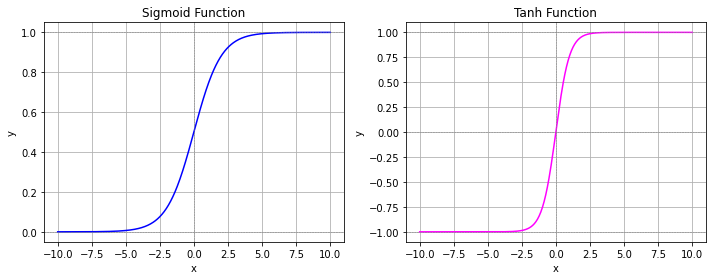

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

# Create input range
x = np.linspace(-10, 10, 500)
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot sigmoid
ax1.plot(x, y_sigmoid, color="blue")
ax1.set_title("Sigmoid Function")
ax1.axhline(0, color='gray', linestyle='--', linewidth=0.5)
ax1.axhline(1, color='gray', linestyle='--', linewidth=0.5)
ax1.axvline(0, color='gray', linestyle='--', linewidth=0.5)
ax1.grid(True)
ax1.set_xlabel("x")
ax1.set_ylabel("y")

# Plot tanh
ax2.plot(x, y_tanh, color="magenta")
ax2.set_title("Tanh Function")
ax2.axhline(0, color='gray', linestyle='--', linewidth=0.5)
ax2.axhline(1, color='gray', linestyle='--', linewidth=0.5)
ax2.axhline(-1, color='gray', linestyle='--', linewidth=0.5)
ax2.axvline(0, color='gray', linestyle='--', linewidth=0.5)
ax2.grid(True)
ax2.set_xlabel("x")
ax2.set_ylabel("y")

plt.tight_layout()
plt.show()


#### ReLU and Leaky ReLU
The Rectified Linear Unit (ReLU) is a currently very popular activation function. It is defined as
$$ ReLU(x) = \max(0, x). $$
ReLU is simple, and it also has a clear definition of a neuron being activated or firing if it returns a nonzero value. A potential drawback of ReLU is neurons whose affine function returns always a negative value become zero after ReLU, and those neurons are often not easily recovered during optimization (dead neuron effect). Depending on the application, this can lead to perfomance issues. In those cases, you can apply the Leaky ReLU that maps negative values to negative values close to zero:
$$LeakyReLU(x) = \begin{cases}x & \text{ if } x\geq0\\
\alpha x & \text{ otherwise }\end{cases}$$
The value of $\alpha$ is typically close to zero, like $\alpha=0.01$.
The plots of both activation functions is below: 

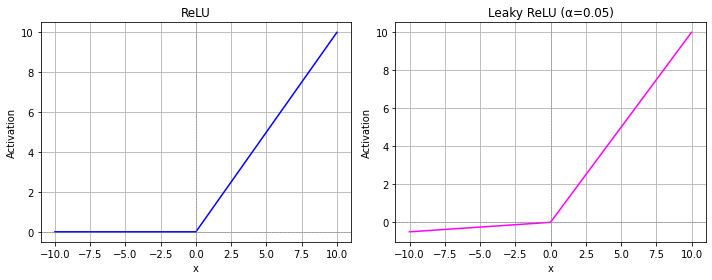

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.05):
    return np.where(x > 0, x, alpha * x)

# Create input range
x = np.linspace(-10, 10, 500)
y_relu = relu(x)
y_leaky_relu = leaky_relu(x)

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot ReLU
ax1.plot(x, y_relu,  color="blue")
ax1.set_title("ReLU")
ax1.axhline(0, color='gray', linewidth=0.5, linestyle='--')
ax1.axvline(0, color='gray', linewidth=0.5, linestyle='--')
ax1.grid(True)

# Plot Leaky ReLU
ax2.plot(x, y_leaky_relu, color="magenta")
ax2.set_title("Leaky ReLU (α=0.05)")
ax2.axhline(0, color='gray', linewidth=0.5, linestyle='--')
ax2.axvline(0, color='gray', linewidth=0.5, linestyle='--')
ax2.grid(True)

# Common settings
for ax in (ax1, ax2):
    ax.set_xlabel("x")
    ax.set_ylabel("Activation")

plt.tight_layout()
plt.show()


### MLPs are Universal Function Approximators

One of the foundational theoretical results for neural networks is the **Universal Approximation Theorem**. This theorem formalizes the power of neural networks: a sufficiently large neural network can approximate any reasonable function to arbitrary accuracy.


The following theorem is a popular variant of a series of universal approximation theorems, stating that a feedforward neural network (MLP) with at least one hidden layer and a suitable activation function (like the sigmoid or ReLU), can approximate any continuous function on a compact subset of $\mathbb{R}^d$, given enough hidden units.

```{prf:theorem} Universal Approximation Theorem
Let $f: \mathbb{R}^d \to \mathbb{R}$ be a continuous function, and let $\epsilon > 0$. Then there exists a neural network (MLP) $f_\theta$ with a single hidden layer with a ReLU, Leaky ReLU or sigmoid activation and a finite number of neurons such that:
\begin{align*}
 \sup_{x \in \mathcal{K}} \lvert f(x) - f_\theta(x)\rvert < \epsilon
\end{align*}
for any compact set $\mathcal{K} \subset \mathbb{R}^d$.
```

This means neural networks can get as close as we want to any target function in theory - with just a single hidden layer. We call networks that have just a single layer, that is typically very wide, a **shallow network**. However, the theorem and its variants are non-constructive: it tells us such a network exists but not how to find it. Still, the theorem motivates research in training neural networks to their full potential. In the context of machine learning, we are particularly interested in training the neural networks such that they learn useful and meaningful representations of the data.     

In practice, **deep neural networks**, using many layers, are more efficiently trained and stored. Shallow neural networks often need a huge amount of neurons in their hidden layer to learn good representations. Stacking instead multiple lower dimensional layers after one another requires often fewer parameters to be trained. 

### MLPs with a Softmax Regression Classifier Head
If we want to pursue specific machine learning tasks, such as classification, we can stack together a more general MLP, stacking linear layers, and a classification module, such as the softmax regression. For example, we can add a softmax regression module to the MLP with two hidden layers, obtaining the following structure:
```{tikz}
\tikzset{%
  every neuron/.style={
    circle,
    draw,
    minimum size=0.5cm
  },
  neuron missing/.style={
    draw=none, 
    scale=2,
    text height=0.25cm,
    execute at begin node=$\vdots$
  },
}

\begin{tikzpicture}[x=1.5cm, y=1cm, >=stealth]

% Create input nodes
\foreach \m/\l [count=\y] in {1,2,3,missing,4}
  \node [every neuron/.try, neuron \m/.try] (input-\m) at (0,2.5-\y) {};

% Create hidden1 layer nodes
\foreach \m [count=\y] in {1,2,missing,3}
  \node [every neuron/.try, neuron \m/.try ] (hidden1-\m) at (1.3,2-\y) {};

% Create hidden2 layer nodes
\foreach \m [count=\y] in {1,2,missing,3}
  \node [every neuron/.try, neuron \m/.try ] (hidden2-\m) at (2.6,2-\y) {};
% Create output layer nodes
\foreach \m [count=\y] in {1,2,missing,3}
  \node [every neuron/.try, neuron \m/.try ] (output-\m) at (3.9,2-\y) {};

\foreach \l [count=\i] in {1,2,3,d}
  \draw [<-] (input-\i) -- ++(-0.7,0)
    node [above, midway] {$x_\l$};

\foreach \j [count=\i] in {1,2,d_2}
    \draw [->] (output-\i) -- ++(2.5,0)
        node [above, midway] {$\mathrm{softmax}(W\mathbf{h}^{(2)}+\mathbf{b})$};

%Connect input to hidden layer
\foreach \i in {1,...,4}
  \foreach \j in {1,...,3}
    \draw [->] (input-\i) -- (hidden1-\j);
%Connect hidden1 to hidden2 layer
\foreach \i in {1,...,3}
  \foreach \j in {1,...,3}
    \draw [->] (hidden1-\i) -- (hidden2-\j);

%Connect hidden2 to output layer
\foreach \i in {1,...,3}
  \foreach \j in {1,...,3}
    \draw [->] (hidden2-\i) -- (output-\j);

\node [above] at (hidden2-1.north) {$\mathbf{h}^{(2)}$};
\node [above] at (hidden1-1.north) {$\mathbf{h}^{(1)}$};

\end{tikzpicture}
```

#### Defining a Classifier MLP in Pytorch
Pytorch is an open source deep learning framework that allows for a flexible definition of MLPs and its optimization. Any neural network, such as our MLP from above, can be implemented as a subclass of `torch.nn.Module`. For classification, the neural network is expected to output the **logits** (the output before softmax) instead of the softmax probabilities, because the softmax is integrated in the computation of the loss functions.     
To define a network, we initialize the layers in the `__init__` function. An affine layer mapping from a $5$-dimensional layer to a $10$-dimensional layer is defined as `nn.Linear(5,10)`. The example below implements a two-hidden-layer network and shows the output (the logits) for five randomly generated data points. 

In [1]:
import torch
import torch.nn as nn

# Two hidden layers: input -> hidden -> 2D latent -> output
class TwoHiddenLayerNet(nn.Module):
    def __init__(self, input_dim=10, num_classes=2):
        super().__init__()
        self.hidden1 = nn.Linear(input_dim, 128)
        self.hidden2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, num_classes)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        return self.output(x)
    
model = TwoHiddenLayerNet(input_dim=10, num_classes=3)
# Create dummy input: batch of 5 samples, each with 10 features
x = torch.randn(5, 10)

# Forward pass
logits = model(x)

# Output
print("Logits:", logits)

Logits: tensor([[ 0.0291,  0.0481,  0.1319],
        [ 0.1440,  0.0606,  0.0421],
        [ 0.0593, -0.0225,  0.1104],
        [ 0.0663, -0.0512,  0.0683],
        [ 0.1370,  0.0256,  0.0808]], grad_fn=<AddmmBackward0>)


We see that the output has an additional variable called `grad_fn`. This variable stores information that is necessary to compute the gradient of the network subject to the weights in the hidden layers. How we are going to compute that, we will see in the next section.